# Description
This notebook is showing how Simulation API could be used in a notebook style. The short notebook is displaying how to create a simulation and visualize its report

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
from collections import namedtuple

In [2]:
url = "http://78.47.131.57:8080"

In [3]:
report_url = url + '/report'

# Read Report

In [4]:
querystring = {"runtime_id": "f22750ce3d1611eaa7be0242ac140003"}

In [5]:
response = requests.request("GET", report_url, params=querystring)
response # should be <Response [200]>

<Response [200]>

In [6]:
report = json.loads(response.text, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))

## Data extracted

In [8]:
servers = report.report
servers[0].name

'App Server 1'

In [9]:
df_list = []
for server in servers:
    print(server.name)
    for component in server.metrics:
        df = pd.DataFrame(component, columns=["step", "cpu_usage", "queue", "label", "name"])
        df_list.append(df)

App Server 1
DB Server 1


In [10]:
df_list[0]

,step,cpu_usage,queue,label,name
0,1.000000,0,0,IN,Anomaly 1
1,1.000000,300,0,IN,Anomaly 1
2,2.000000,300,0,OUT,Anomaly 1
3,2.000000,0,0,OUT,Anomaly 1
4,3.040469,1,0,IN,15292
...,...,...,...,...,...
4543,8.724508,4,0,OUT,16821
4544,8.735746,3,0,OUT,17208
4545,8.811031,2,0,OUT,19095
4546,10.462086,1,0,OUT,18816


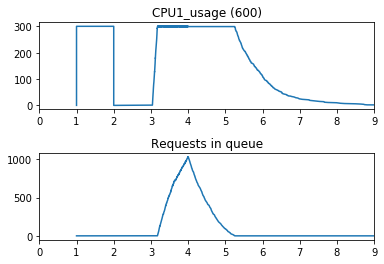

In [11]:
data_frame = df_list[0]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU1_usage (600)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

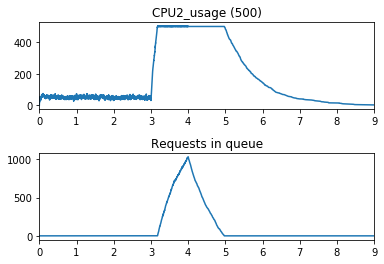

In [12]:
data_frame = df_list[1]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU2_usage (500)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)